<a href="https://colab.research.google.com/github/RifqiMakarim/GWR_IndeksKualitasLingkungan/blob/main/Analisis_OLS-GWR-MGWR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalasi dan Import

In [ ]:
!pip install mgwr geopandas libpysal esda -q

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical modeling
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Machine learning metrics & preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Spatial analysis
import geopandas as gpd
from libpysal.weights import KNN
from esda.moran import Moran

# GWR / MGWR
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

# Google Colab utility
from google.colab import files


## Load Data

In [ ]:
# uploaded = files.upload()

In [ ]:

# df = pd.read_csv("Dataset_IKLH_2024.csv")

url = 'https://raw.githubusercontent.com/RifqiMakarim/GWR_IndeksKualitasLingkungan/refs/heads/main/Dataset_IKLH_2024.csv'
df = pd.read_csv(url)

print(f"Jumlah observasi: {len(df)}")
print(f"\nKolom tersedia:\n{df.columns.tolist()}")

Jumlah observasi: 119

Kolom tersedia:
['Kabupaten_Kota', 'Latitude', 'Longitude', 'Jumlah_Kendaraan_Bermotor', 'Kepadatan_Penduduk', 'Akses_Sanitasi', 'JumlahLuas_Hutan', 'PDRB', 'Timbulan_Sampah', 'IKLH']


In [ ]:
df.head()

,Kabupaten_Kota,Latitude,Longitude,Jumlah_Kendaraan_Bermotor,Kepadatan_Penduduk,Akses_Sanitasi,JumlahLuas_Hutan,PDRB,Timbulan_Sampah,IKLH
0,Pandeglang,-6.314835,106.103897,413970.0,478.0,63.66,111588.82,21928.59,191663.840,60.29
1,Lebak,-6.564396,106.252214,469398.0,438.0,70.23,35338.76,23377.24,223608.340,60.27
2,Tangerang,-6.178306,106.631889,1357079.0,3309.0,89.38,1601.60,113998.21,334823.125,55.87
3,Serang,-6.120090,106.150299,733336.0,1158.0,85.31,7027.49,63255.33,438206.520,53.59
4,Kota_Tangerang,-6.178306,106.631889,2859081.0,11012.0,96.93,0.00,125060.32,798405.910,55.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Kabupaten_Kota             119 non-null    object 
 1   Latitude                   119 non-null    float64
 2   Longitude                  119 non-null    float64
 3   Jumlah_Kendaraan_Bermotor  119 non-null    float64
 4   Kepadatan_Penduduk         119 non-null    float64
 5   Akses_Sanitasi             119 non-null    float64
 6   JumlahLuas_Hutan           119 non-null    float64
 7   PDRB                       119 non-null    float64
 8   Timbulan_Sampah            119 non-null    float64
 9   IKLH                       119 non-null    float64
dtypes: float64(9), object(1)
memory usage: 9.4+ KB


## Exploratory Data Analysis

In [ ]:
print("\n" + "="*50)
print("STATISTIK DESKRIPTIF")
print("="*50)
print(df.describe())





STATISTIK DESKRIPTIF
         Latitude   Longitude  Jumlah_Kendaraan_Bermotor  Kepadatan_Penduduk  \
count  119.000000  119.000000               1.190000e+02          119.000000   
mean    -7.056840  110.012402               1.009111e+06         3269.524286   
std      1.192264    2.623195               9.723843e+05         4421.312906   
min     -8.749315  106.040506               6.029000e+03          384.780000   
25%     -7.679782  108.061402               4.472090e+05          786.000000   
50%     -7.289166  110.174797               6.910500e+05         1147.000000   
75%     -6.777712  111.509592               1.375964e+06         3485.000000   
max      0.882681  124.466957               7.490111e+06        21955.000000   

       Akses_Sanitasi  JumlahLuas_Hutan           PDRB  Timbulan_Sampah  \
count      119.000000        119.000000     119.000000       119.000000   
mean        84.746387      26020.615714   57616.131092    238033.633594   
std         13.425568      34398

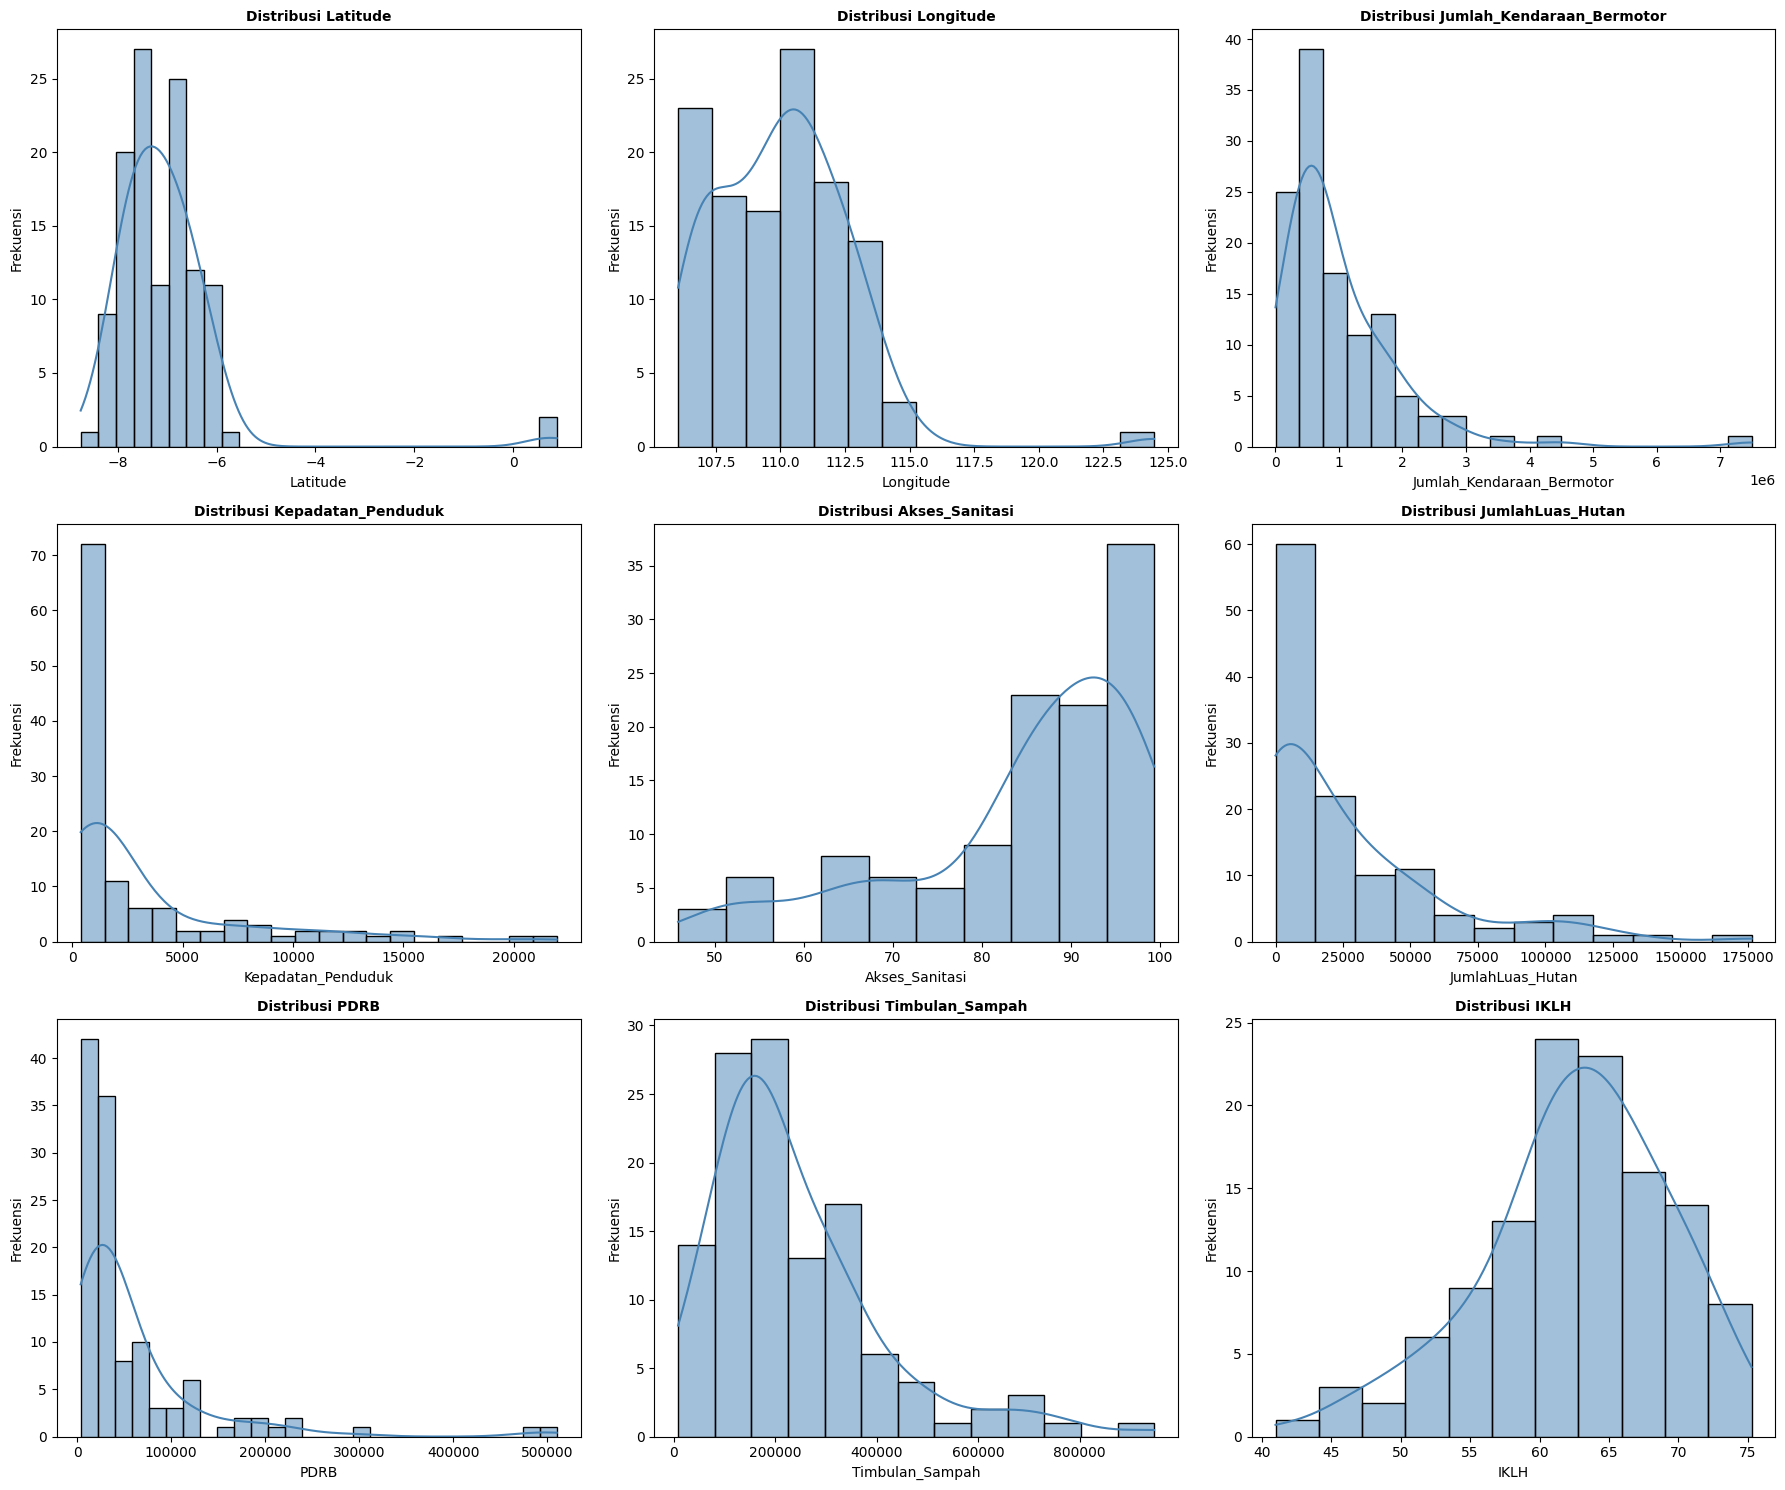

In [ ]:
# Visualisasi distribusi variabel numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'No' in numerical_cols:
    numerical_cols.remove('No')

num_plots = len(numerical_cols)
num_rows = (num_plots + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='steelblue')
    axes[i].set_title(f'Distribusi {col}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
#plt.savefig('distribusi_variabel.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
df.columns.tolist()

['Kabupaten_Kota',
 'Latitude',
 'Longitude',
 'Jumlah_Kendaraan_Bermotor',
 'Kepadatan_Penduduk',
 'Akses_Sanitasi',
 'JumlahLuas_Hutan',
 'PDRB',
 'Timbulan_Sampah',
 'IKLH']

In [ ]:
# Log Transformasi
cols_to_log = [
    "Jumlah_Kendaraan_Bermotor",
    "Kepadatan_Penduduk",
    "Akses_Sanitasi",
    "JumlahLuas_Hutan",
    "PDRB",
    "Timbulan_Sampah",
    "IKLH"
]

for col in cols_to_log:

    df[col] = np.log1p(df[col])



ANALISIS KORELASI



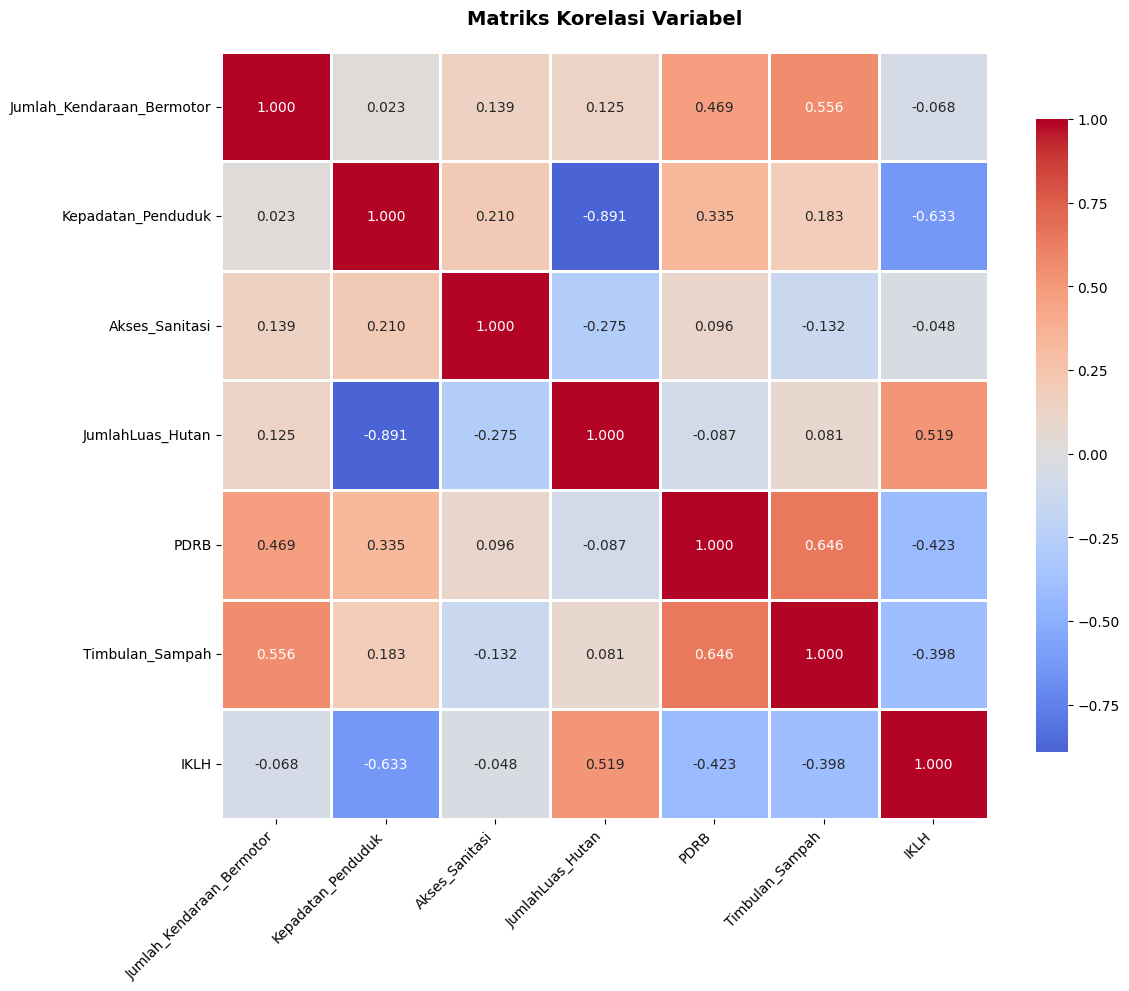


Korelasi dengan IKLH (terurut):
JumlahLuas_Hutan             0.519120
Akses_Sanitasi              -0.048196
Jumlah_Kendaraan_Bermotor   -0.068490
Timbulan_Sampah             -0.397863
PDRB                        -0.422862
Kepadatan_Penduduk          -0.633018
Name: IKLH, dtype: float64


In [ ]:

print("\nANALISIS KORELASI\n")


corr_vars = ["Jumlah_Kendaraan_Bermotor","Kepadatan_Penduduk","Akses_Sanitasi","JumlahLuas_Hutan","PDRB","Timbulan_Sampah","IKLH"]

# Filter hanya variabel yang ada di dataset
corr_vars = [v for v in corr_vars if v in df.columns]

corr_matrix = df[corr_vars].corr()

# Heatmap korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriks Korelasi Variabel', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig('korelasi_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Korelasi dengan IKLH (diurutkan)
corr_with_iklh = corr_matrix['IKLH'].drop('IKLH').sort_values(ascending=False)
print("\nKorelasi dengan IKLH (terurut):")
print(corr_with_iklh)

# # Simpan ke Excel
# corr_matrix.to_excel("Korelasi_Variabel.xlsx")
# print("\nFile 'Korelasi_Variabel.xlsx' berhasil disimpan.")


In [ ]:

print("\nPEMILIHAN VARIABEL BERDASARKAN KORELASI\n")

# variabel dengan korelasi tertinggi
top_vars = corr_with_iklh.head(4).index.tolist()
print(f"\nVariabel terpilih (korelasi tertinggi):\n{top_vars}")

# Manual selection (uncomment jika ingin pilih manual)
# top_vars = ["IKL", "IKU", "IKA"]
# top_vars = ["IKU", "Sampah_Tidak_Terkelola", "Jumlah_Kendaraan_Bermotor", "Kepadatan_Penduduk"]

# Definisi variabel untuk modeling
X_vars = top_vars.copy()
y_var = "IKLH"

print(f"\nVariabel Independen (X): {X_vars}")
print(f"Variabel Dependen (Y): {y_var}")


PEMILIHAN VARIABEL BERDASARKAN KORELASI


Variabel terpilih (korelasi tertinggi):
['JumlahLuas_Hutan', 'Akses_Sanitasi', 'Jumlah_Kendaraan_Bermotor', 'Timbulan_Sampah']

Variabel Independen (X): ['JumlahLuas_Hutan', 'Akses_Sanitasi', 'Jumlah_Kendaraan_Bermotor', 'Timbulan_Sampah']
Variabel Dependen (Y): IKLH


### Uji Multikolinearitas

In [ ]:

print("FILTERING VARIABEL (UJI VIF ITERATIF)")
print("="*50)

def hitung_vif(data, features):
    X_temp = data[features]
    # Tambah konstanta untuk perhitungan VIF yang akurat
    X_temp = sm.add_constant(X_temp)
    vif_df = pd.DataFrame()
    vif_df["Variabel"] = X_temp.columns
    vif_df["VIF"] = [variance_inflation_factor(X_temp.values, i) for i in range(X_temp.shape[1])]
    # Hapus baris konstanta dari hasil output
    vif_df = vif_df[vif_df["Variabel"] != "const"]
    return vif_df

# Loop untuk membuang variabel dengan VIF tinggi satu per satu
while True:
    vif_data = hitung_vif(df, X_vars)
    max_vif = vif_data["VIF"].max()

    if max_vif > 10:
        # Ambil variabel dengan VIF tertinggi
        var_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["Variabel"]
        val_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["VIF"]

        print(f"Membuang '{var_to_drop}' (VIF: {val_to_drop:.2f}) karena > 10")
        X_vars.remove(var_to_drop)
    else:
        print("\nSemua variabel aman (VIF < 10).")
        print(vif_data)
        break

print(f"\nVariabel Final untuk Modeling: {X_vars}")


print("\n" + "="*50)
print("PERSIAPAN DATA")
print("="*50)

#Gunakan X_vars yang sudah bersih dari VIF
X_raw = df[X_vars].values
y_raw = df[y_var].values.reshape(-1, 1)
coords = df[['Longitude', 'Latitude']].values

# Standardisasi (PENTING untuk GWR!)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw).flatten()

# Untuk OLS: tambah konstanta
X_ols = sm.add_constant(X_scaled)

print("Data berhasil distandardisasi!")
print(f"   Shape X: {X_scaled.shape}")
print(f"   Shape y: {y_scaled.shape}")

FILTERING VARIABEL (UJI VIF ITERATIF)

Semua variabel aman (VIF < 10).
                    Variabel       VIF
1           JumlahLuas_Hutan  1.119183
2             Akses_Sanitasi  1.200576
3  Jumlah_Kendaraan_Bermotor  1.601512
4            Timbulan_Sampah  1.555077

Variabel Final untuk Modeling: ['JumlahLuas_Hutan', 'Akses_Sanitasi', 'Jumlah_Kendaraan_Bermotor', 'Timbulan_Sampah']

PERSIAPAN DATA
Data berhasil distandardisasi!
   Shape X: (119, 4)
   Shape y: (119,)


## Regresi Global ( OLS )

In [ ]:
print("REGRESI OLS (MODEL GLOBAL)")
print("="*50)

model_ols = sm.OLS(y_scaled, X_ols)
ols_results = model_ols.fit()

print(ols_results.summary())

# Hitung AICc untuk OLS
n = X_ols.shape[0]
k = X_ols.shape[1]
AIC_ols = ols_results.aic
aicc_ols = AIC_ols + (2*k*(k+1)) / (n - k - 1)

print(f"\nMetrik OLS:")
print(f"   R² = {ols_results.rsquared:.4f}")
print(f"   Adjusted R² = {ols_results.rsquared_adj:.4f}")
print(f"   AICc = {aicc_ols:.2f}")

REGRESI OLS (MODEL GLOBAL)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     26.50
Date:                Sat, 13 Dec 2025   Prob (F-statistic):           1.52e-15
Time:                        23:49:18   Log-Likelihood:                -129.74
No. Observations:                 119   AIC:                             269.5
Df Residuals:                     114   BIC:                             283.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.696e-15    

Uji Signifikansi Variabel (Uji t), jika P>|t| kurang dari 0.05 berarti signifikan, jika P<|t| lebih dari 0.05 berarti tidak signifikan

### Uji Moran's I

In [ ]:
print("UJI AUTOKORELASI SPASIAL (MORAN'S I)")
print("="*50)

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
residuals = ols_results.resid
w = KNN.from_dataframe(gdf, k=4)
gdf['res_ols'] = residuals

mi = Moran(gdf['res_ols'], w)
print(f"Moran's I: {mi.I:.4f}")
print(f"p-value: {mi.p_sim:.4f}")

if mi.p_sim < 0.05:
    print("\nAda autokorelasi spasial signifikan → LANJUT KE GWR")
else:
    print("\nTidak ada autokorelasi spasial signifikan → OLS Cukup (tapi GWR tetap dijalankan)")

UJI AUTOKORELASI SPASIAL (MORAN'S I)
Moran's I: 0.1779
p-value: 0.0030

Ada autokorelasi spasial signifikan → LANJUT KE GWR


## GWR

#### Adaptive Bisquare

In [ ]:
print("GEOGRAPHICALLY WEIGHTED REGRESSION (GWR)")
print("="*50)

# Persiapan data untuk GWR
X_gwr = X_scaled  # Sudah standar
y_gwr = y_scaled.reshape(-1, 1)

# Pencarian Bandwidth (Menggunakan Adaptive Bisquare sebagai default terbaik untuk kebanyakan kasus)
print("\n🔍 Mencari bandwidth optimal (Adaptive Bisquare)...")
selector = Sel_BW(coords, y_gwr, X_gwr, fixed=False, kernel='bisquare')
bw = selector.search(bw_min=5)

# print(f"Bandwidth optimal: {int(bw)} tetangga")

# Fitting GWR
gwr_model = GWR(coords, y_gwr, X_gwr, bw, fixed=False, kernel='bisquare')
gwr_results = gwr_model.fit()

print("\n" + "="*50)
print("HASIL GWR")
print("="*50)
gwr_results.summary()

# Tampilkan Komparasi Cepat
print("\nPerbandingan")
print(f"OLS R²: {ols_results.rsquared:.4f} | AICc: {aicc_ols:.2f}")
print(f"GWR R²: {gwr_results.R2:.4f}     | AICc: {gwr_results.aicc:.2f}")

if gwr_results.aicc < aicc_ols - 3:
    print("\nModel GWR LEBIH BAIK daripada OLS.")
else:
    print("\nModel OLS sudah CUKUP BAIK (GWR tidak memberi peningkatan signifikan).")

GEOGRAPHICALLY WEIGHTED REGRESSION (GWR)

🔍 Mencari bandwidth optimal (Adaptive Bisquare)...

HASIL GWR
Model type                                                         Gaussian
Number of observations:                                                 119
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             61.666
Log-likelihood:                                                    -129.739
AIC:                                                                269.478
AICc:                                                               272.228
BIC:                                                               -483.154
R2:                                                                   0.482
Adj. R2:                                                              0.464

Variable                        

### Multiscale GWR
Menggunakan Adaptive Bisquare

In [ ]:
print("\nMencari bandwidth optimal untuk MGWR (Multi-scale)...")

# Selector untuk MGWR (multi=True)
selector_mgwr = Sel_BW(coords, y_gwr, X_gwr, fixed=False, kernel='bisquare', multi=True)
bw_mgwr = selector_mgwr.search(multi_bw_min=[2]) # Mencari bandwidth untuk tiap variabel

print(f"Bandwidth per variabel: {bw_mgwr}")

# Fitting MGWR
mgwr_model = MGWR(coords, y_gwr, X_gwr, selector_mgwr, fixed=False, kernel='bisquare')
mgwr_results = mgwr_model.fit()

mgwr_results.summary()


# Tampilkan Komparasi Cepat
print("\nPerbandingan")
print(f"OLS R²: {ols_results.rsquared:.4f} | AICc: {aicc_ols:.2f}")
print(f"MGWR R²: {mgwr_results.R2:.4f}     | AICc: {mgwr_results.aicc:.2f}")

if mgwr_results.aicc < aicc_ols - 3:
    print("\nModel GWR LEBIH BAIK daripada OLS.")
else:
    print("\nModel OLS sudah CUKUP BAIK (GWR tidak memberi peningkatan signifikan).")


Mencari bandwidth optimal untuk MGWR (Multi-scale)...


Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

Bandwidth per variabel: [ 53. 117.  47. 117.  94.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

Model type                                                         Gaussian
Number of observations:                                                 119
Number of covariates:                                                     5

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                             61.666
Log-likelihood:                                                    -129.739
AIC:                                                                269.478
AICc:                                                               272.228
BIC:                                                               -483.154
R2:                                                                   0.482
Adj. R2:                                                              0.464

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

### Perbandingan

PERBANDINGAN AKHIR: OLS vs GWR vs MGWR
     Metrik      OLS      GWR     MGWR
         R²   0.4818   0.6202   0.6392
Adjusted R²   0.4636   0.5605   0.5859
       AICc 270.0086 262.6752 254.2295

Model Terbaik berdasarkan AICc: MGWR (AICc: 254.23)

--------------------------------------------------
VISUALISASI
--------------------------------------------------


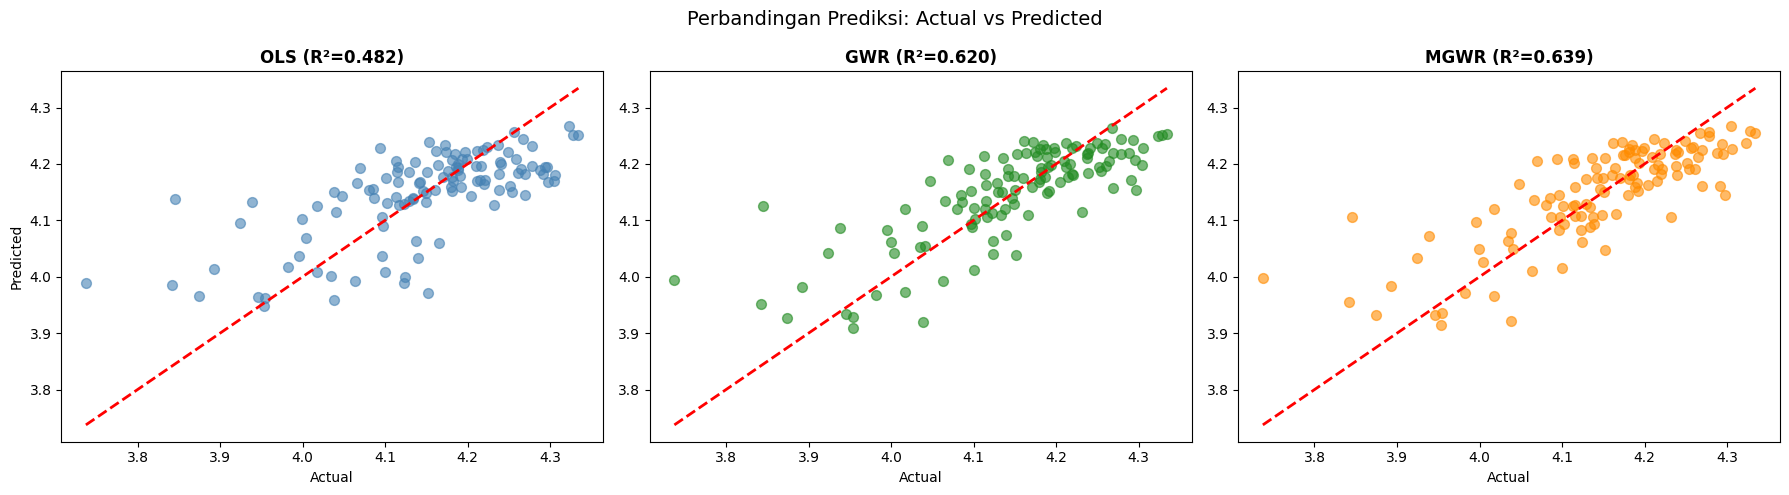

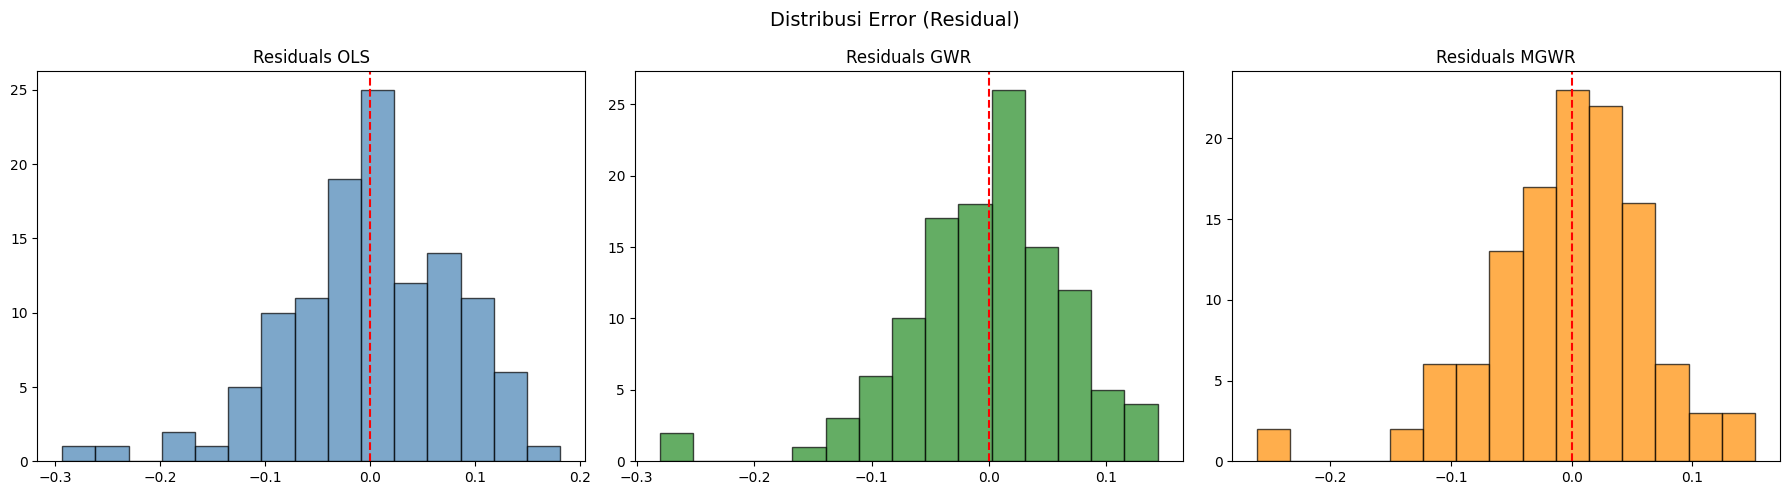

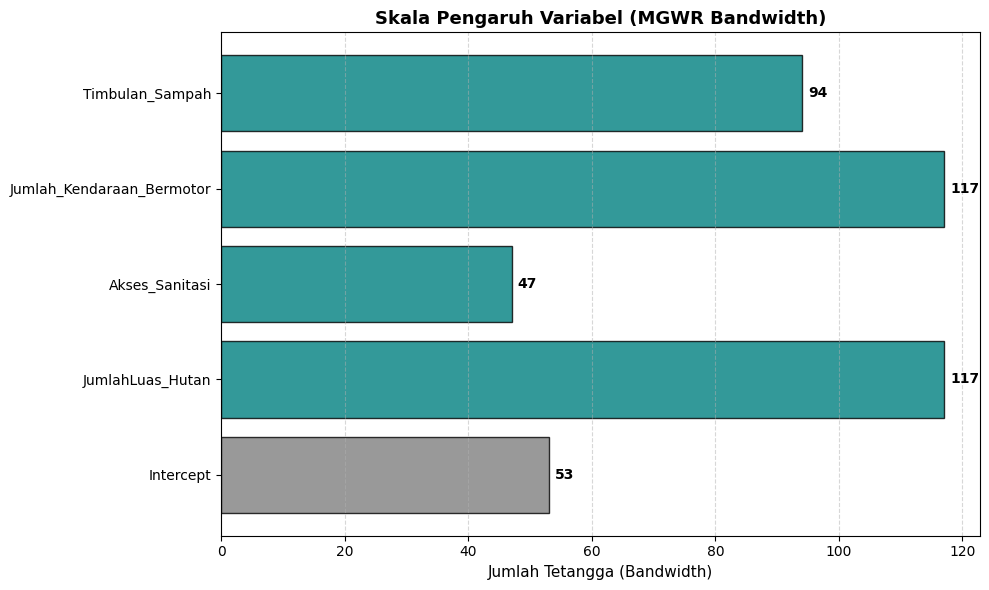

In [ ]:
print("PERBANDINGAN AKHIR: OLS vs GWR vs MGWR")
print("="*50)

comparison = pd.DataFrame({
    'Metrik': ['R²', 'Adjusted R²', 'AICc'],
    'OLS': [ols_results.rsquared, ols_results.rsquared_adj, aicc_ols],
    'GWR': [gwr_results.R2, gwr_results.adj_R2, gwr_results.aicc],
    'MGWR': [mgwr_results.R2, mgwr_results.adj_R2, mgwr_results.aicc]
})

pd.options.display.float_format = '{:.4f}'.format
print(comparison.to_string(index=False))

# Evaluasi AICc Terbaik
best_aicc = comparison.iloc[2, 1:].min() # Baris index 2 adalah AICc
best_model = comparison.columns[comparison.iloc[2, :].tolist().index(best_aicc)]

print(f"\nModel Terbaik berdasarkan AICc: {best_model} (AICc: {best_aicc:.2f})")

# Prediksi OLS (Skala Asli)
y_pred_ols_scaled = ols_results.predict(X_ols)
y_pred_ols = scaler_y.inverse_transform(y_pred_ols_scaled.reshape(-1, 1)).flatten()

# Prediksi GWR (Skala Asli)
y_pred_gwr_scaled = gwr_results.predy.flatten()
y_pred_gwr = scaler_y.inverse_transform(y_pred_gwr_scaled.reshape(-1, 1)).flatten()

# Prediksi MGWR (Skala Asli)
y_pred_mgwr_scaled = mgwr_results.predy.flatten()
y_pred_mgwr = scaler_y.inverse_transform(y_pred_mgwr_scaled.reshape(-1, 1)).flatten()

print("\n" + "-"*50)
print("VISUALISASI")
print("-"*50)

# ACTUAL VS PREDICTED
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# OLS
axes[0].scatter(df["IKLH"], y_pred_ols, alpha=0.6, s=50, color='steelblue')
axes[0].plot([df["IKLH"].min(), df["IKLH"].max()], [df["IKLH"].min(), df["IKLH"].max()], 'r--', lw=2)
axes[0].set_title(f'OLS (R²={ols_results.rsquared:.3f})', fontweight='bold')
axes[0].set_xlabel('Actual')
axes[0].set_ylabel('Predicted')

# GWR
axes[1].scatter(df["IKLH"], y_pred_gwr, alpha=0.6, s=50, color='forestgreen')
axes[1].plot([df["IKLH"].min(), df["IKLH"].max()], [df["IKLH"].min(), df["IKLH"].max()], 'r--', lw=2)
axes[1].set_title(f'GWR (R²={gwr_results.R2:.3f})', fontweight='bold')
axes[1].set_xlabel('Actual')

# MGWR
axes[2].scatter(df["IKLH"], y_pred_mgwr, alpha=0.6, s=50, color='darkorange')
axes[2].plot([df["IKLH"].min(), df["IKLH"].max()], [df["IKLH"].min(), df["IKLH"].max()], 'r--', lw=2)
axes[2].set_title(f'MGWR (R²={mgwr_results.R2:.3f})', fontweight='bold')
axes[2].set_xlabel('Actual')

plt.suptitle('Perbandingan Prediksi: Actual vs Predicted', fontsize=14)
plt.tight_layout()
plt.show()

# DISTRIBUSI RESIDUAL (3 Subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# OLS Residuals
axes[0].hist(df["IKLH"] - y_pred_ols, bins=15, alpha=0.7, color='steelblue', edgecolor='black')
axes[0].axvline(0, color='red', linestyle='--')
axes[0].set_title('Residuals OLS')

# GWR Residuals
axes[1].hist(df["IKLH"] - y_pred_gwr, bins=15, alpha=0.7, color='forestgreen', edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--')
axes[1].set_title('Residuals GWR')

# MGWR Residuals
axes[2].hist(df["IKLH"] - y_pred_mgwr, bins=15, alpha=0.7, color='darkorange', edgecolor='black')
axes[2].axvline(0, color='red', linestyle='--')
axes[2].set_title('Residuals MGWR')

plt.suptitle('Distribusi Error (Residual)', fontsize=14)
plt.tight_layout()
plt.show()

bw_df = pd.DataFrame({
    'Variabel': ['Intercept'] + list(X_vars), # Menambahkan Intercept
    'Bandwidth': bw_mgwr
})

plt.figure(figsize=(10, 6))
colors = ['gray'] + ['teal'] * len(X_vars) # Warna beda untuk intercept
bars = plt.barh(bw_df['Variabel'], bw_df['Bandwidth'], color=colors, edgecolor='black', alpha=0.8)

plt.xlabel('Jumlah Tetangga (Bandwidth)', fontsize=11)
plt.title('Skala Pengaruh Variabel (MGWR Bandwidth)', fontsize=13, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


#Visualisasi Peta

File GeoJSON berhasil dimuat.
Jumlah wilayah yang berhasil dipetakan: 118 dari 119 data asli.


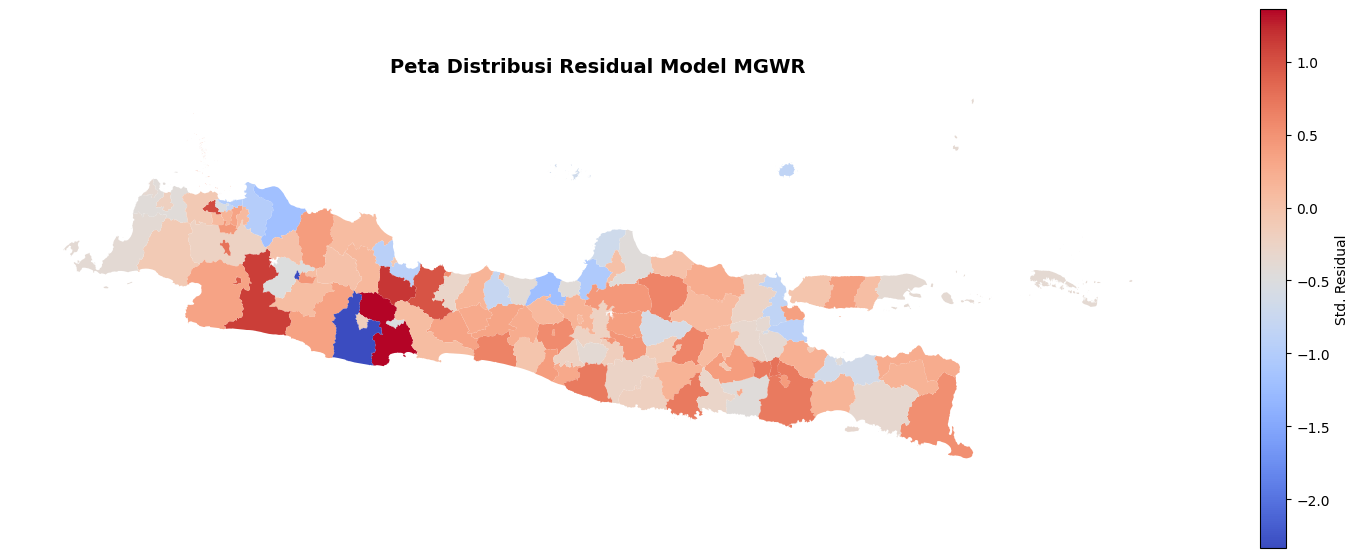

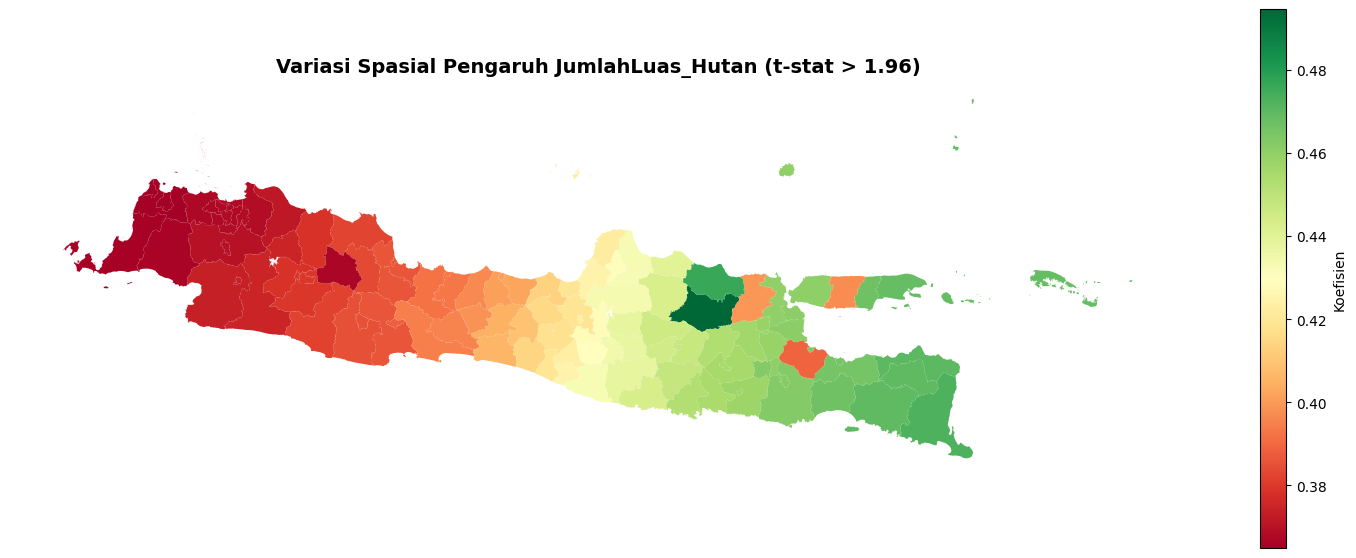

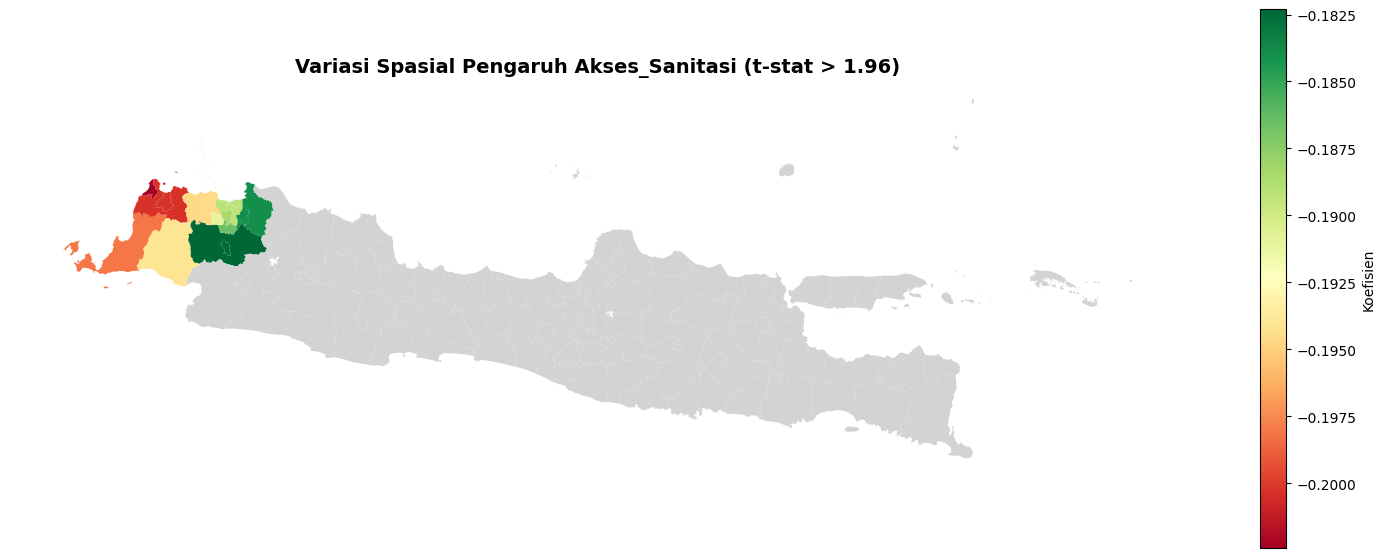

[SKIP] Peta 'Variasi Spasial Pengaruh Jumlah_Kendaraan_Bermotor (t-stat > 1.96)' dilewati karena tidak ada wilayah yang signifikan.


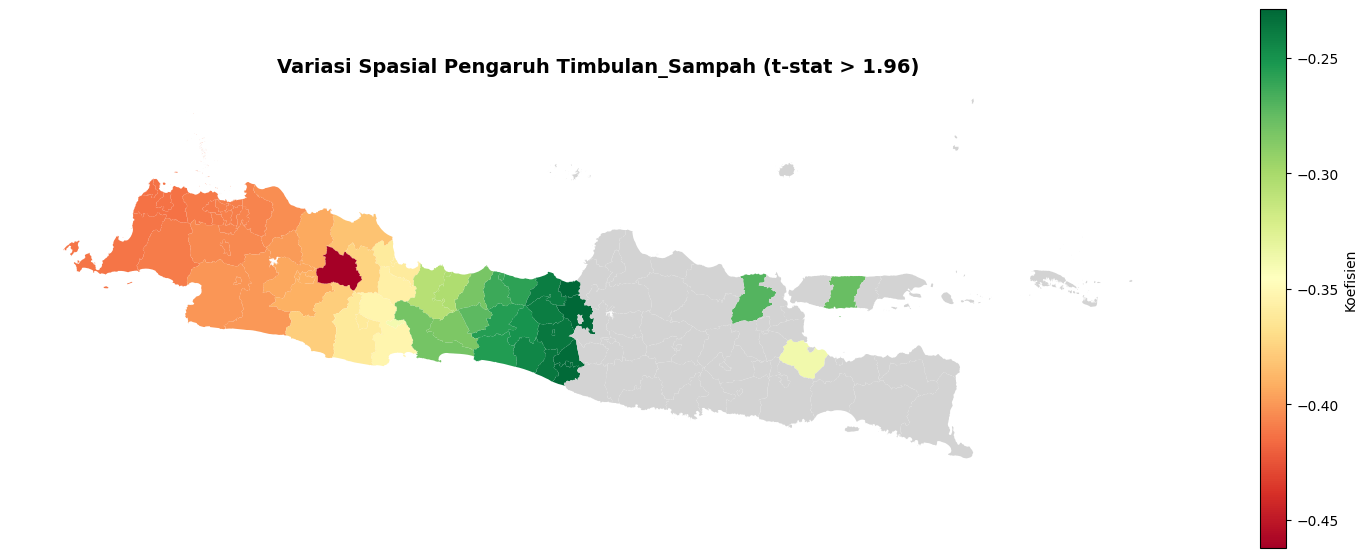

In [ ]:
# Data GeoJSON
url_geojson = 'https://raw.githubusercontent.com/RifqiMakarim/GWR_IndeksKualitasLingkungan/refs/heads/main/java_kabkota_fixed.geojson'
try:
    gdf_shape = gpd.read_file(url_geojson)
    print("File GeoJSON berhasil dimuat.")
except Exception as e:
    print(f"Error memuat GeoJSON: {e}")
    print("Pastikan file 'java_kabkota_fixed.geojson' sudah diupload.")

# Penyelarasan Nama (Data Matching)
def bersihkan_nama(nama):
    if isinstance(nama, str):
        return nama.replace('_', ' ').lower().strip()
    return str(nama)

# Buat kolom kunci di kedua data
df['join_key'] = df['Kabupaten_Kota'].apply(bersihkan_nama)
gdf_shape['join_key'] = gdf_shape['NAME_2'].apply(bersihkan_nama)

# Perbaikan
df['join_key'] = df['join_key'].replace({'gunungkidul': 'gunung kidul'})

# Menggunakan residuals
params_mgwr = mgwr_results.params
tvals_mgwr = mgwr_results.tvalues
df['MGWR_Residuals'] = mgwr_results.resid_response

# Masukkan Koefisien dan Filter Signifikansi (t-value > 1.96)
nama_variabel_lengkap = ['Intercept'] + X_vars

for i, var in enumerate(nama_variabel_lengkap):
    df[f'Coef_{var}'] = params_mgwr[:, i]
    df[f'tVal_{var}'] = tvals_mgwr[:, i]

    # Filter t-value > 1.96 (signifikan)
    df[f'Sig_{var}'] = np.where(np.abs(df[f'tVal_{var}']) > 1.96, df[f'Coef_{var}'], np.nan)

# Peta
gdf_final = pd.merge(gdf_shape, df, on='join_key', how='inner')
print(f"Jumlah wilayah yang berhasil dipetakan: {len(gdf_final)} dari {len(df)} data asli.")

def plot_peta_spasial(gdf, kolom, judul, cmap='RdYlBu', label_legend='Nilai'):
    if gdf[kolom].isnull().all():
        print(f"[SKIP] Peta '{judul}' dilewati karena tidak ada wilayah yang signifikan.")
        return

    fig, ax = plt.subplots(1, 1, figsize=(15, 8))

    # Plot data
    gdf.plot(column=kolom,
             ax=ax,
             legend=True,
             cmap=cmap,
             legend_kwds={'label': label_legend, 'orientation': "vertical", 'shrink': 0.7},
             missing_kwds={'color': 'lightgrey', 'label': 'Tidak Signifikan / No Data'}
            )

    ax.set_title(judul, fontsize=14, fontweight='bold')
    ax.set_axis_off()
    plt.tight_layout()

    # nama_file = judul.replace(' ', '_').replace('/', '') + ".png"
    #plt.savefig(nama_file, dpi=300, bbox_inches='tight')
    # print(f"Peta disimpan: {nama_file}")
    plt.show()

# A. Peta Residuals
# Interpretasi:
# - Warna Pucat (0) = Model Sangat Akurat (Prediksi dekat dengan Asli)
# - Warna Pekat (Merah/Biru) = Model kurang akurat (Over/Under estimate)
plot_peta_spasial(gdf_final, 'MGWR_Residuals', 'Peta Distribusi Residual Model MGWR', cmap='coolwarm', label_legend='Std. Residual')

# B. Peta Koefisien Variabel Independen (Hanya yang Signifikan)
for var in X_vars:
    nama_kolom_sig = f'Sig_{var}'
    judul_peta = f'Variasi Spasial Pengaruh {var} (t-stat > 1.96)'

    plot_peta_spasial(gdf_final, nama_kolom_sig, judul_peta, cmap='RdYlGn', label_legend='Koefisien')

Visualisasi Peta

Data Statistik Asli: 119 baris.
Data Terpetakan: 118 wilayah.
(Selisih data adalah wilayah yang tidak memiliki poligon di file GeoJSON)

Tabel Referensi Wilayah
-> Gambar disimpan: Peta_GWR_-_Local_R-Squared.png


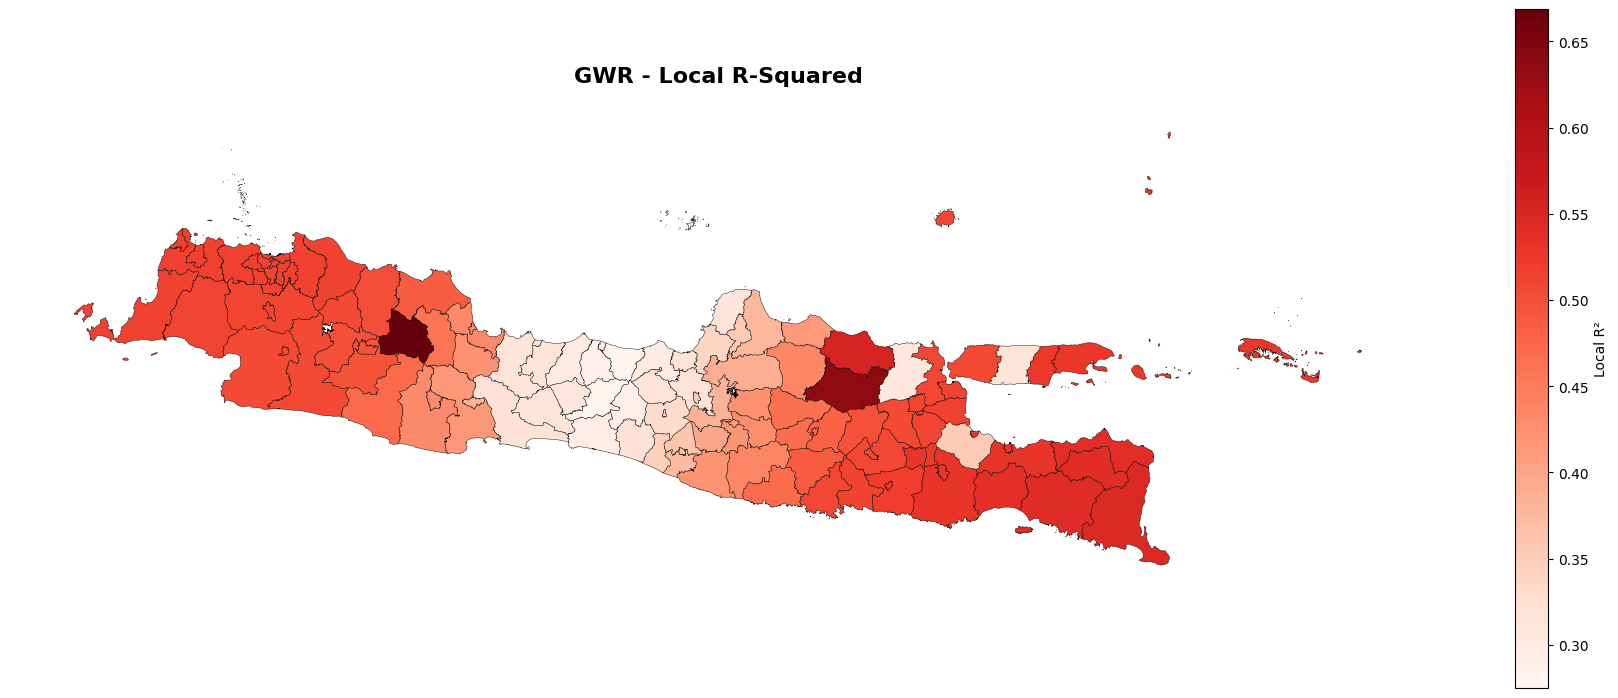

-> Gambar disimpan: Peta_MGWR_-_Distribusi_Spasial_Residual.png


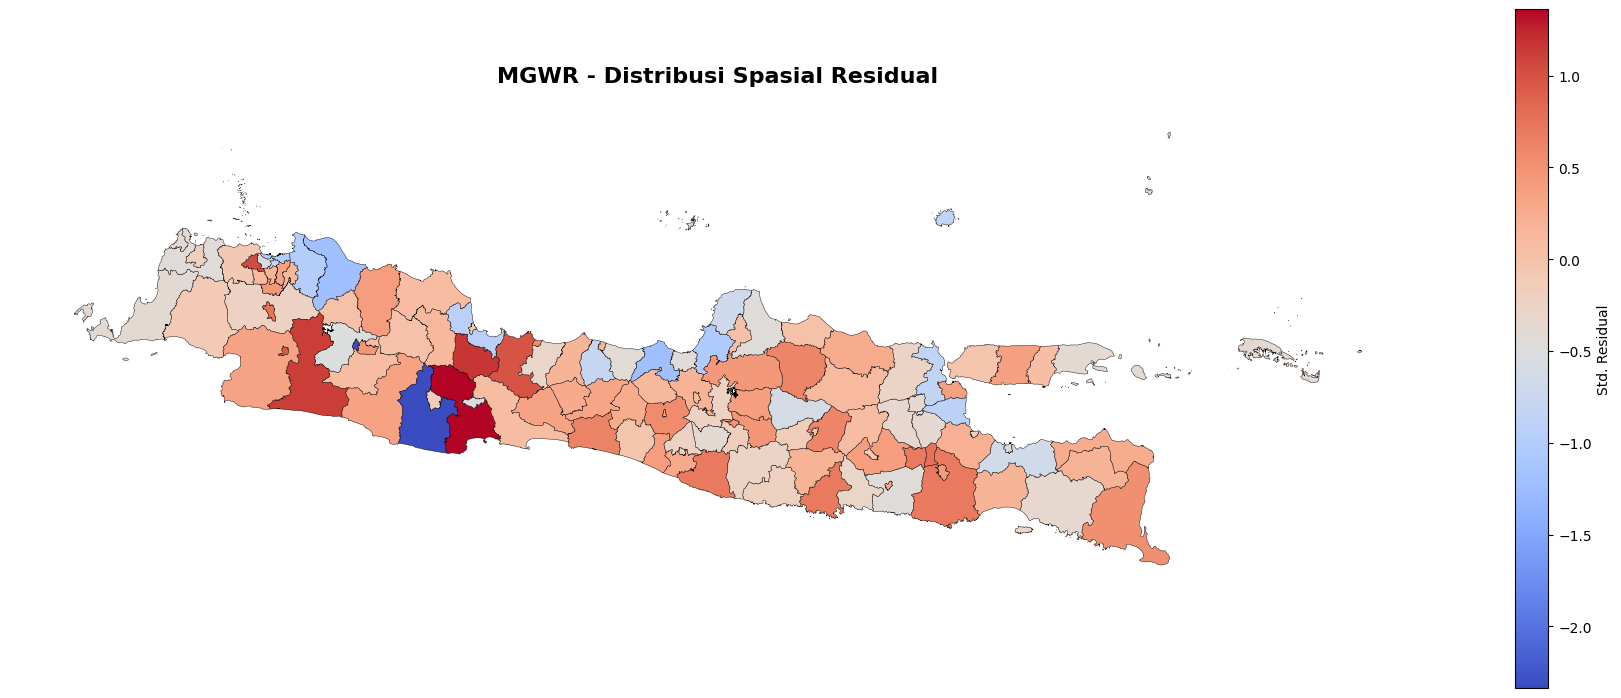

-> Gambar disimpan: Peta_Peta_Signifikansi_Pengaruh_Jumlah_Luas_Hutan_(MGWR).png


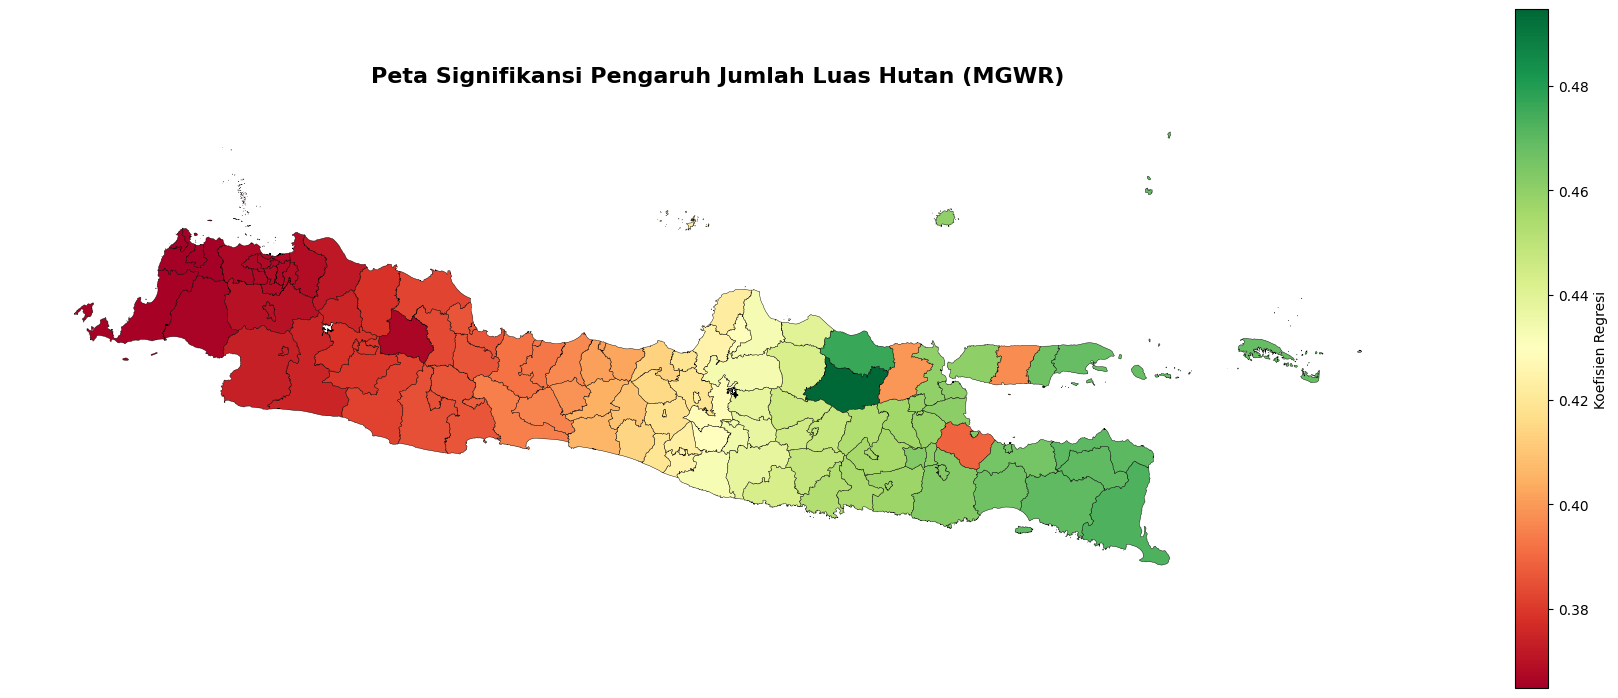

-> Gambar disimpan: Peta_Peta_Signifikansi_Pengaruh_Akses_Sanitasi_(MGWR).png


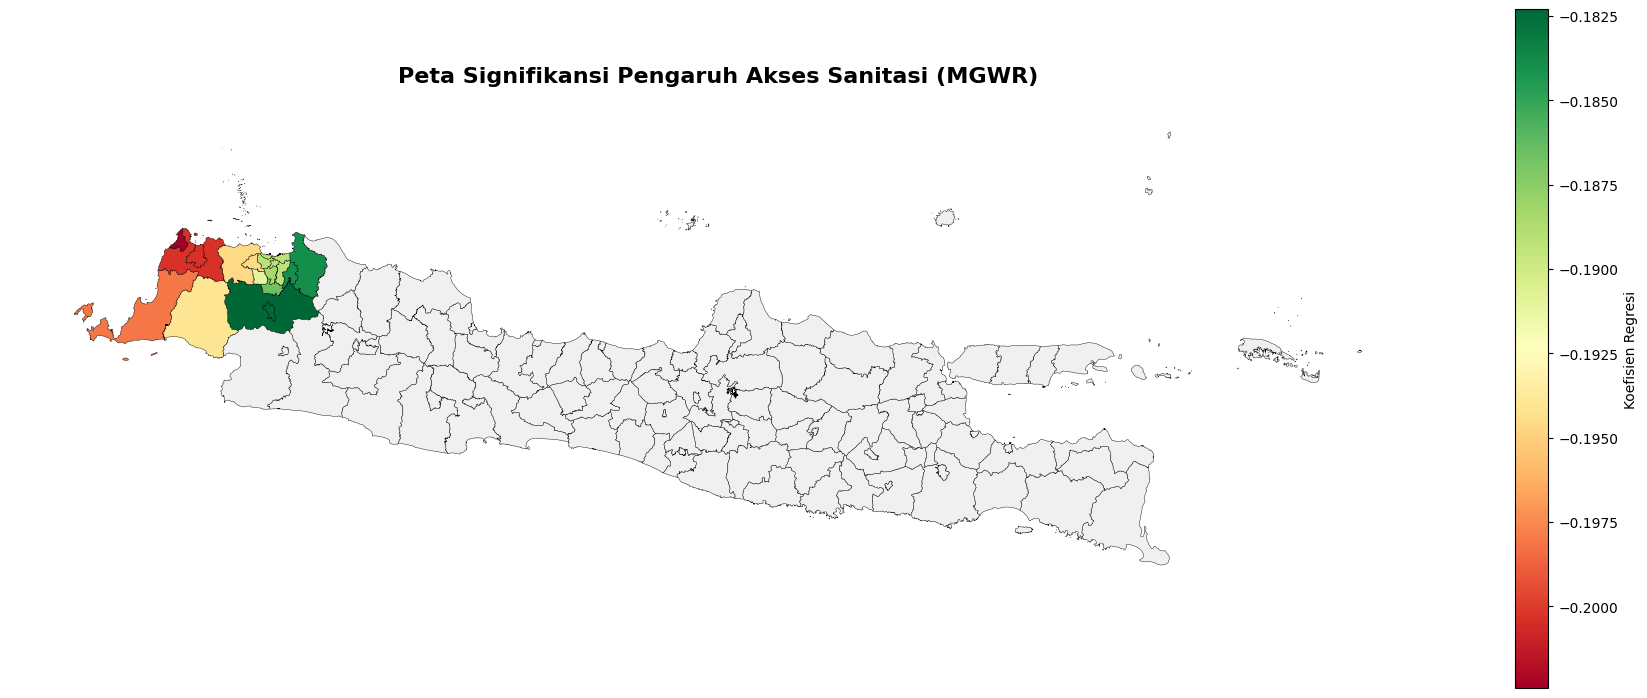

[SKIP] Peta Signifikansi Pengaruh Akses Sanitasi (MGWR) - Data kosong.
-> Gambar disimpan: Peta_Peta_Signifikansi_Pengaruh_Timbulan_Sampah_(MGWR).png


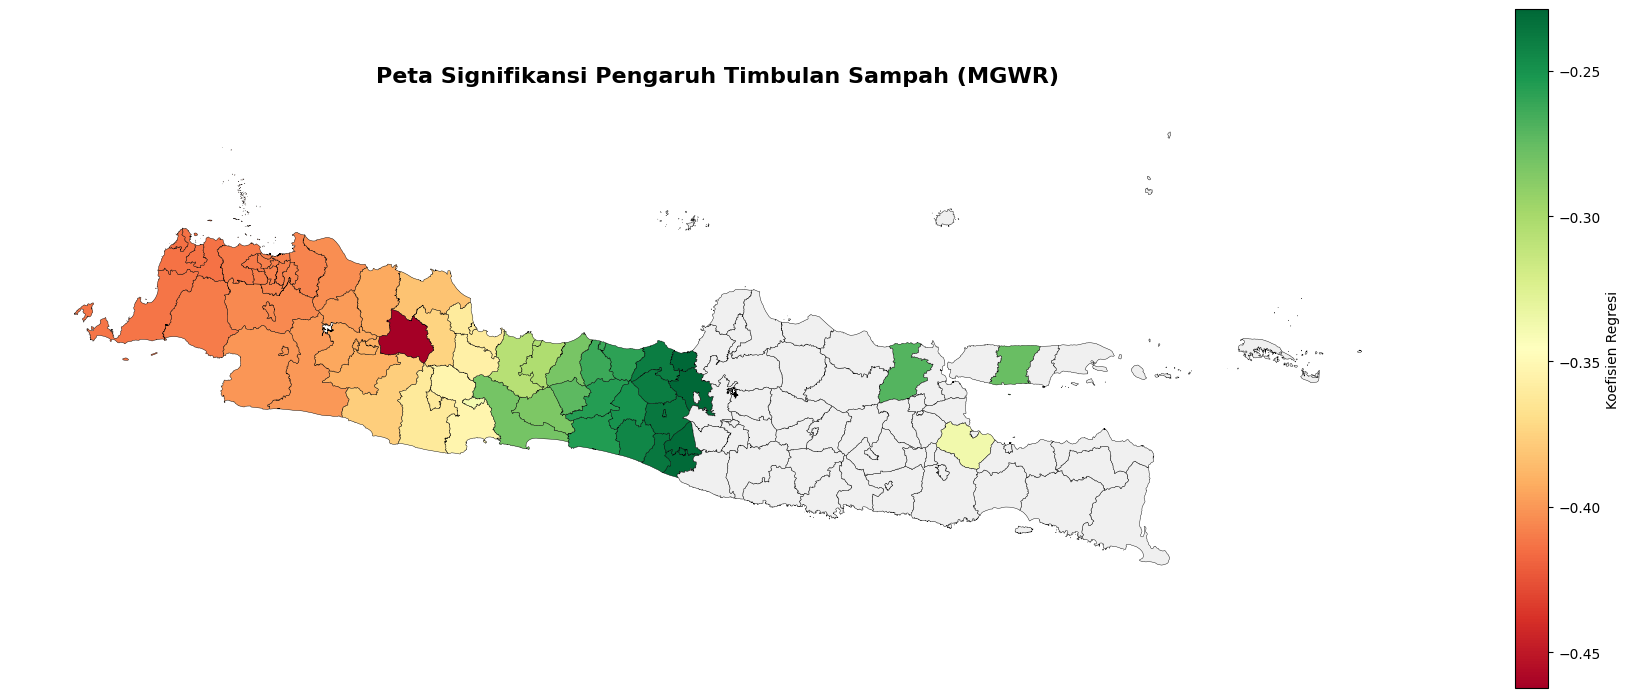

In [ ]:
print("Visualisasi Peta\n")
# GWR (Local R-Squared)
df['GWR_Local_R2'] = gwr_results.localR2

# MGWR
df['MGWR_Residuals'] = mgwr_results.resid_response

# Koefisien & Signifikansi MGWR
nama_variabel_lengkap = ['Intercept'] + X_vars
params_mgwr = mgwr_results.params
tvals_mgwr = mgwr_results.tvalues

for i, var in enumerate(nama_variabel_lengkap):
    df[f'Coef_{var}'] = params_mgwr[:, i]
    df[f'tVal_{var}'] = tvals_mgwr[:, i]
    # Filter Signifikansi (Hanya simpan nilai jika t > 1.96, lainnya NaN)
    df[f'Sig_{var}'] = np.where(np.abs(df[f'tVal_{var}']) > 1.96, df[f'Coef_{var}'], np.nan)

# GeoJSON
gdf_shape = gpd.read_file(url_geojson)

def bersihkan_nama(nama):
    if isinstance(nama, str): return nama.replace('_', ' ').lower().strip()
    return str(nama)

df['join_key'] = df['Kabupaten_Kota'].apply(bersihkan_nama)
gdf_shape['join_key'] = gdf_shape['NAME_2'].apply(bersihkan_nama)

# Koreksi nama manual
df['join_key'] = df['join_key'].replace({'gunungkidul': 'gunung kidul'})

# Inner Join
gdf_final = pd.merge(gdf_shape, df, on='join_key', how='inner')

# Mengurutkan
gdf_final = gdf_final.sort_values('Kabupaten_Kota').reset_index(drop=True)
gdf_final['Map_ID'] = gdf_final.index + 1

print(f"Data Statistik Asli: {len(df)} baris.")
print(f"Data Terpetakan: {len(gdf_final)} wilayah.")
print("(Selisih data adalah wilayah yang tidak memiliki poligon di file GeoJSON)")


print("\nTabel Referensi Wilayah")

# Kolom yang akan disimpan
cols_ref = ['Map_ID', 'Kabupaten_Kota']
if 'Provinsi' in gdf_final.columns: cols_ref.append('Provinsi')

# tabel_referensi = gdf_final[cols_ref].copy()

# nama_file_tabel = "Tabel_Indeks_Wilayah.xlsx"
# tabel_referensi.to_excel(nama_file_tabel, index=False)

# print(f"-> Tabel Referensi disimpan: {nama_file_tabel}")
# print(tabel_referensi.head().to_string(index=False))

def plot_peta_angka(gdf, kolom, judul, cmap='RdYlBu', label_legend='Nilai'):

    if gdf[kolom].isnull().all():
        print(f"[SKIP] {judul} - Data kosong.")
        return

    # Setup Figure
    fig, ax = plt.subplots(1, 1, figsize=(18, 10))

    # Plot Peta
    gdf.plot(column=kolom, ax=ax, legend=True, cmap=cmap,
             legend_kwds={'label': label_legend, 'orientation': "vertical", 'shrink': 0.7},
             missing_kwds={'color': '#f0f0f0', 'label': 'Tidak Signifikan'},
             edgecolor='black', linewidth=0.3)

    # Label Angka (Map_ID)
    # for idx, row in gdf.iterrows():
    #     x, y = row.geometry.centroid.x, row.geometry.centroid.y
    #     label_num = str(row['Map_ID'])

        # angka kecil di tengah wilayah
        # ax.text(x, y, label_num, fontsize=3, ha='center', va='center',
        #         color='black', fontweight='bold')

    ax.set_title(judul, fontsize=16, fontweight='bold', pad=20)
    ax.set_axis_off()
    plt.tight_layout()

    # Simpan Gambar
    filename = "Peta_" + judul.replace(' ', '_').replace('/', '') + ".png"
    # plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"-> Gambar disimpan: {filename}")
    plt.show()

# PETA GWR LOCAL R-SQUARED Menunjukkan di mana model GWR bekerja paling baik
plot_peta_angka(gdf_final, 'GWR_Local_R2',
                'GWR - Local R-Squared',
                cmap='Reds', label_legend='Local R²')

# PETA MGWR RESIDUALS Menunjukkan sisa error pada model MGWR
plot_peta_angka(gdf_final, 'MGWR_Residuals',
                'MGWR - Distribusi Spasial Residual',
                cmap='coolwarm', label_legend='Std. Residual')

# PETA SIGNIFIKANSI VARIABEL (MGWR)
for var in X_vars:
    col = f'Sig_{var}'
    if var == 'JumlahLuas_Hutan':
      title = f'Peta Signifikansi Pengaruh Jumlah Luas Hutan (MGWR)'
    elif var == 'Akses_Sanitasi':
      title = f'Peta Signifikansi Pengaruh Akses Sanitasi (MGWR)'
    elif var == 'Timbulan_Sampah':
      title = f'Peta Signifikansi Pengaruh Timbulan Sampah (MGWR)'

    plot_peta_angka(gdf_final, col, title,
                    cmap='RdYlGn', label_legend='Koefisien Regresi')


In [ ]:
print("\nTop 10 Wilayah dengan Local R² Tertinggi (GWR)")
print("="*50)

top_10_local_r2 = gdf_final.sort_values(by='GWR_Local_R2', ascending=False).head(10)
print(top_10_local_r2[['Kabupaten_Kota', 'GWR_Local_R2']].to_string(index=False))


Top 10 Wilayah dengan Local R² Tertinggi (GWR)
  Kabupaten_Kota  GWR_Local_R2
        Sumedang        0.6687
      Bojonegoro        0.6361
           Tuban        0.5542
      Banyuwangi        0.5468
          Jember        0.5421
       Bondowoso        0.5396
       Situbondo        0.5380
        Lumajang        0.5374
Kota_Probolinggo        0.5309
     Probolinggo        0.5308


In [ ]:
gdf_final

,id,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,...,tVal_Akses_Sanitasi,Sig_Akses_Sanitasi,Coef_Jumlah_Kendaraan_Bermotor,tVal_Jumlah_Kendaraan_Bermotor,Sig_Jumlah_Kendaraan_Bermotor,Coef_Timbulan_Sampah,tVal_Timbulan_Sampah,Sig_Timbulan_Sampah,GWR_Local_R2,Map_ID
0,81,IDN.9.2_1,IDN,Indonesia,IDN.9_1,JawaBarat,NA,Bandung,NA,NA,...,-1.1767,NaN,0.0515,0.5129,NaN,-0.3908,-3.3848,-0.3908,0.4967,1
1,82,IDN.9.1_1,IDN,Indonesia,IDN.9_1,JawaBarat,NA,Bandung Barat,NA,NA,...,-1.5249,NaN,0.0505,0.5025,NaN,-0.3945,-3.4128,-0.3945,0.5006,2
2,144,IDN.11.1_1,IDN,Indonesia,IDN.11_1,JawaTimur,NA,Bangkalan,NA,NA,...,0.3421,NaN,0.0828,0.7911,NaN,-0.1742,-1.5623,NaN,0.5067,3
3,108,IDN.10.1_1,IDN,Indonesia,IDN.10_1,JawaTengah,NA,Banjarnegara,NA,NA,...,-1.5171,NaN,0.0755,0.7489,NaN,-0.2553,-1.9910,-0.2553,0.2803,4
4,497,IDN.33.1_1,IDN,Indonesia,IDN.33_1,Yogyakarta,NA,Bantul,NA,NA,...,-0.9809,NaN,0.0932,0.8999,NaN,-0.2304,-1.9935,-0.2304,0.3738,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,179,IDN.11.36_1,IDN,Indonesia,IDN.11_1,JawaTimur,NA,Trenggalek,NA,NA,...,0.9588,NaN,0.0889,0.8530,NaN,-0.1904,-1.7218,NaN,0.5072,114
114,180,IDN.11.37_1,IDN,Indonesia,IDN.11_1,JawaTimur,NA,Tuban,NA,NA,...,0.6095,NaN,0.0896,0.8427,NaN,-0.1656,-1.4690,NaN,0.5542,115
115,181,IDN.11.38_1,IDN,Indonesia,IDN.11_1,JawaTimur,NA,Tulungagung,NA,NA,...,0.8367,NaN,0.0887,0.8498,NaN,-0.1873,-1.6937,NaN,0.5130,116
116,142,IDN.10.35_1,IDN,Indonesia,IDN.10_1,JawaTengah,NA,Wonogiri,NA,NA,...,-0.0090,NaN,0.0903,0.8683,NaN,-0.2093,-1.8760,NaN,0.4395,117


## Untuk Analisis Variabel yang tidak signifikan

ANALISIS VARIABEL TIDAK SIGNIFIKAN
Sedang membuat peta T-Statistics untuk Jumlah_Kendaraan_Bermotor...


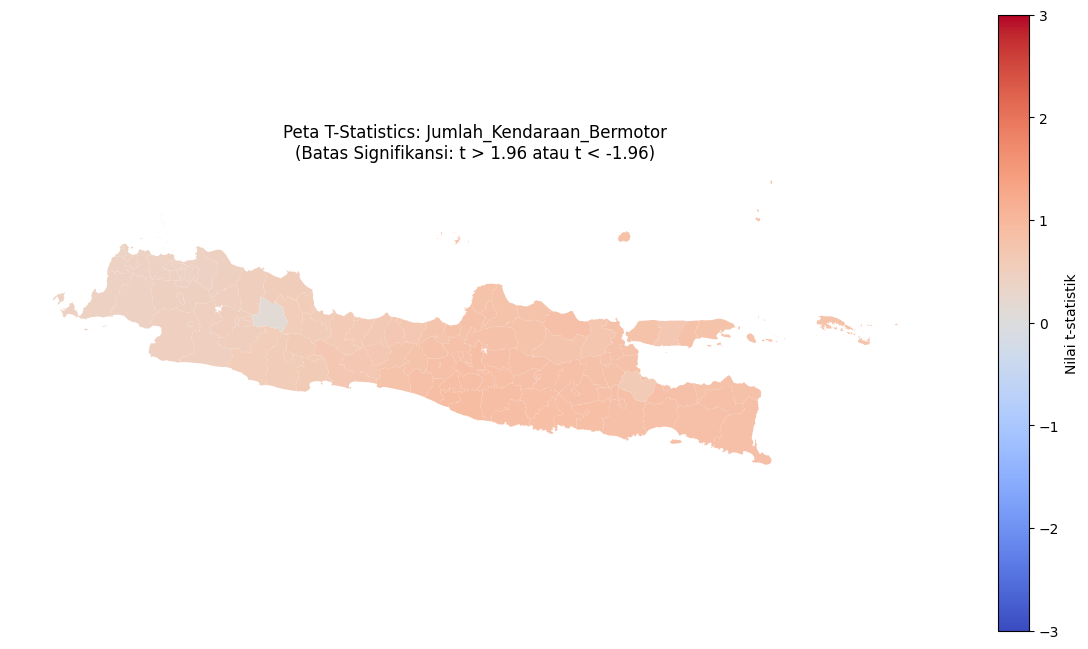

Rangkuman T-Statistik Jumlah_Kendaraan_Bermotor:
   Maksimum: 0.9011
   Minimum : 0.1184


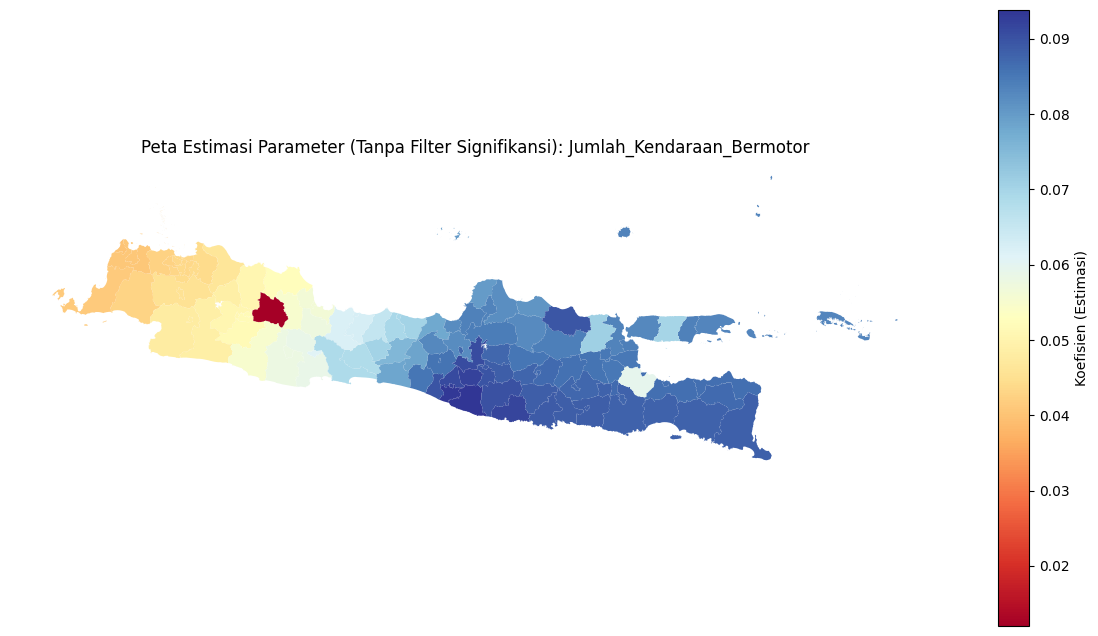

In [ ]:
print("ANALISIS VARIABEL TIDAK SIGNIFIKAN")
print("="*50)

# Tentukan variabel yang ingin dicek (yang tadi tidak muncul petanya)
# Pastikan nama variabel sesuai dengan yang ada di X_vars
target_var = "Jumlah_Kendaraan_Bermotor"

# Cek apakah variabel ini ada di kolom hasil
if f'Coef_{target_var}' in gdf_final.columns:

    # 1. Plot Distribusi T-Values (Untuk melihat seberapa jauh dari 1.96)
    # Batas signifikansi adalah -1.96 dan +1.96

    judul_t = f'Peta T-Statistics: {target_var}'
    print(f"Sedang membuat peta T-Statistics untuk {target_var}...")

    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    gdf_final.plot(column=f'tVal_{target_var}',
                   ax=ax, legend=True, cmap='coolwarm',
                   legend_kwds={'label': 'Nilai t-statistik'},
                   vmin=-3, vmax=3) # Set range agar terlihat jika ada yang mendekati 1.96

    ax.set_title(judul_t + "\n(Batas Signifikansi: t > 1.96 atau t < -1.96)", fontsize=12)
    ax.set_axis_off()
    plt.show()

    # Cek statistik t-value
    max_t = gdf_final[f'tVal_{target_var}'].max()
    min_t = gdf_final[f'tVal_{target_var}'].min()
    print(f"Rangkuman T-Statistik {target_var}:")
    print(f"   Maksimum: {max_t:.4f}")
    print(f"   Minimum : {min_t:.4f}")

    # 2. Plot Koefisien Murni (Tanpa Filter)
    # Ini untuk melihat "Arah Hubungan" (Positif/Negatif) meskipun tidak signifikan

    judul_c = f'Peta Estimasi Parameter (Tanpa Filter Signifikansi): {target_var}'

    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    gdf_final.plot(column=f'Coef_{target_var}',
                   ax=ax, legend=True, cmap='RdYlBu', # Merah-Biru
                   legend_kwds={'label': 'Koefisien (Estimasi)'})

    ax.set_title(judul_c, fontsize=12)
    ax.set_axis_off()
    plt.show()

else:
    print(f"Variabel {target_var} tidak ditemukan dalam hasil MGWR.")

## Interpretasi

In [ ]:
print("INTERPRETASI WILAYAH SPESIFIK")
print("="*50)

# Daftar variabel independen
vars_analisis = ['JumlahLuas_Hutan', 'Akses_Sanitasi', 'Jumlah_Kendaraan_Bermotor', 'Timbulan_Sampah']

for var in vars_analisis:
    col_coef = f'Coef_{var}'
    col_sig = f'Sig_{var}'

    # Cek apakah kolom ada
    if col_sig in gdf_final.columns:
        print(f"\n--- VARIABEL: {var} ---")

        # Ambil hanya yang signifikan
        data_sig = gdf_final.dropna(subset=[col_sig])

        if len(data_sig) > 0:
            # Urutkan dari Koefisien TERTINGGI (Pengaruh Positif Terkuat)
            top_5 = data_sig.sort_values(by=col_coef, ascending=False).head(5)
            print("5 Wilayah dengan Pengaruh POSITIF Terkuat:")
            print(top_5[['Kabupaten_Kota', col_coef]].to_string(index=False))

            # Urutkan dari Koefisien TERENDAH (Pengaruh Negatif Terkuat atau Positif Terlemah)
            bot_5 = data_sig.sort_values(by=col_coef, ascending=True).head(5)
            print("\n5 Wilayah dengan Pengaruh NEGATIF Terkuat (atau terendah):")
            print(bot_5[['Kabupaten_Kota', col_coef]].to_string(index=False))
        else:
            print("Tidak ada wilayah yang signifikan untuk variabel ini.")

INTERPRETASI WILAYAH SPESIFIK

--- VARIABEL: JumlahLuas_Hutan ---
5 Wilayah dengan Pengaruh POSITIF Terkuat:
Kabupaten_Kota  Coef_JumlahLuas_Hutan
    Bojonegoro                 0.4946
         Tuban                 0.4762
    Banyuwangi                 0.4727
     Situbondo                 0.4701
     Bondowoso                 0.4696

5 Wilayah dengan Pengaruh NEGATIF Terkuat (atau terendah):
  Kabupaten_Kota  Coef_JumlahLuas_Hutan
    Kota_Cilegon                 0.3649
     Kota_Serang                 0.3653
          Serang                 0.3653
      Pandeglang                 0.3655
Kepulauan Seribu                 0.3660

--- VARIABEL: Akses_Sanitasi ---
5 Wilayah dengan Pengaruh POSITIF Terkuat:
Kabupaten_Kota  Coef_Akses_Sanitasi
         Bogor              -0.1823
    Kota_Bogor              -0.1823
        Bekasi              -0.1839
   Kota_Bekasi              -0.1839
    Kota_Depok              -0.1866

5 Wilayah dengan Pengaruh NEGATIF Terkuat (atau terendah):
  Kabupate

INTERPRETASI WILAYAH SPESIFIK


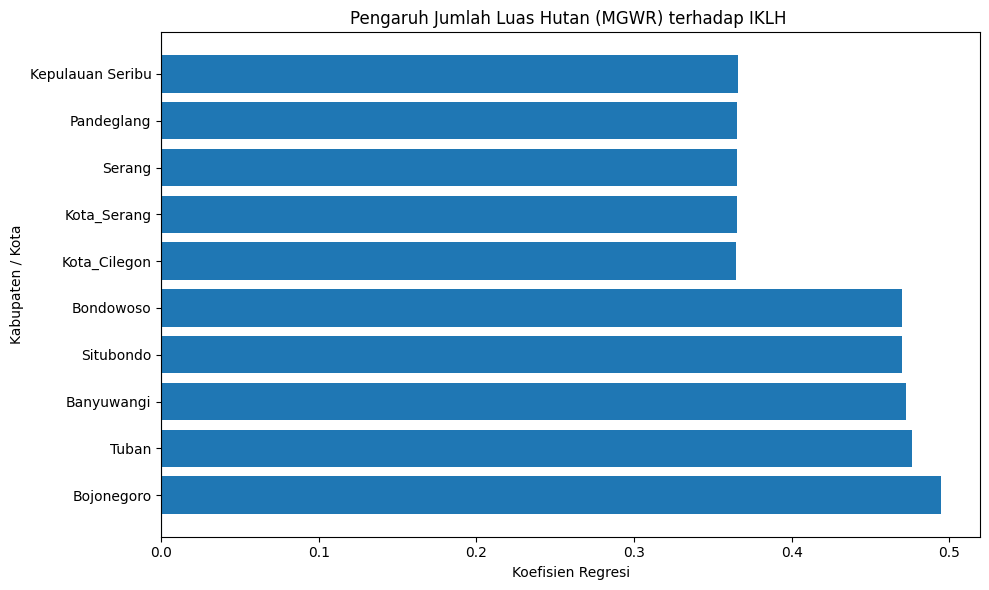

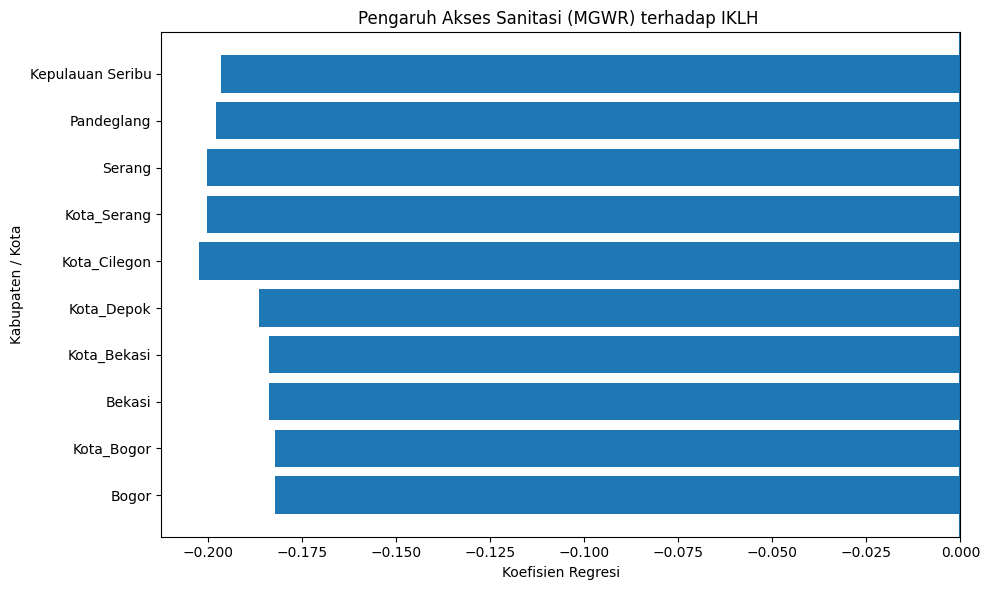

Tidak ada wilayah signifikan untuk variabel Jumlah_Kendaraan_Bermotor


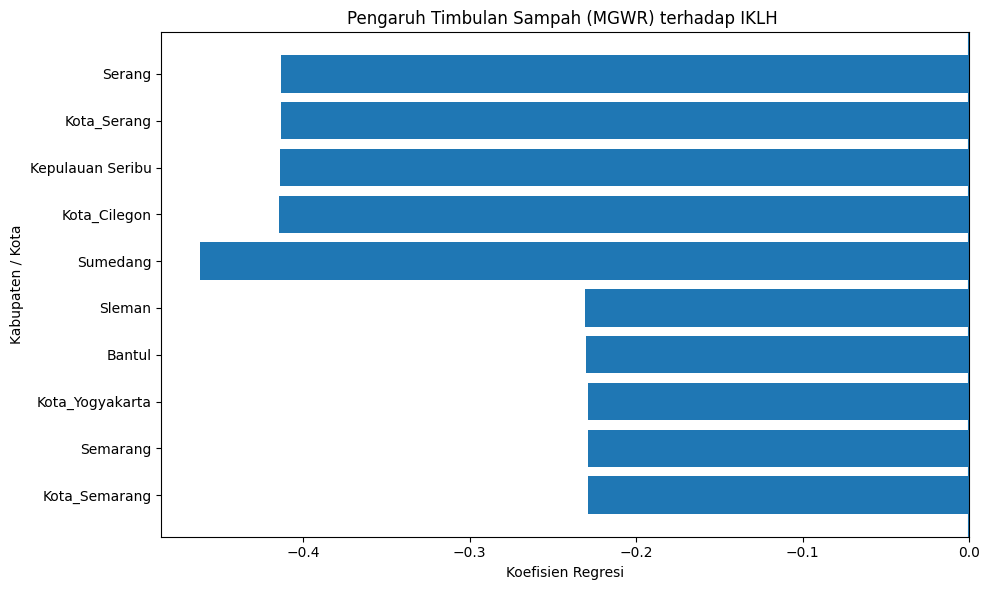

In [ ]:
print("INTERPRETASI WILAYAH SPESIFIK")
print("="*50)

# Daftar variabel independen
vars_analisis = [
    'JumlahLuas_Hutan',
    'Akses_Sanitasi',
    'Jumlah_Kendaraan_Bermotor',
    'Timbulan_Sampah'
]

for var in vars_analisis:
    col_coef = f'Coef_{var}'
    col_sig = f'Sig_{var}'

    if var == 'JumlahLuas_Hutan':
      title_ = f'Pengaruh Jumlah Luas Hutan (MGWR) terhadap IKLH '
    elif var == 'Akses_Sanitasi':
      title_ = f'Pengaruh Akses Sanitasi (MGWR) terhadap IKLH '
    elif var == 'Timbulan_Sampah':
      title_ = f'Pengaruh Timbulan Sampah (MGWR) terhadap IKLH '

    # Cek apakah kolom tersedia
    if col_sig in gdf_final.columns:

        # Ambil hanya wilayah yang signifikan
        data_sig = gdf_final.dropna(subset=[col_sig])

        if len(data_sig) > 0:

            # Top 5 pengaruh positif
            top_5 = data_sig.sort_values(by=col_coef, ascending=False).head(5)

            # Top 5 pengaruh negatif
            bot_5 = data_sig.sort_values(by=col_coef, ascending=True).head(5)

            # Gabungkan untuk visualisasi
            plot_data = pd.concat([top_5, bot_5])

            # Buat grafik batang
            plt.figure(figsize=(10, 6))
            plt.barh(
                plot_data['Kabupaten_Kota'],
                plot_data[col_coef]
            )

            plt.axvline(0)  # garis nol
            plt.title(title_)
            plt.xlabel('Koefisien Regresi')
            plt.ylabel('Kabupaten / Kota')
            plt.tight_layout()
            plt.show()

        else:
            print(f"Tidak ada wilayah signifikan untuk variabel {var}")
